### yfinance를 이용하여 종목 주가 통계자료를 다운로드받는 함수 개발하기
### get_stock_history_from_yahoo(file, start, end)
### 개요: 
     - /Data/Input/폴더안에 종목들이 정의가 된 csv 파일을 read
     - 각 종목 통계자료를 /Data/Output/폴더안에 csv 파일 형태로 저장

### 인수: 
     (1)file: 종목이 정의가 된 csv파일명(string), default는 input.csv
     (2)start: 통계 자료가 시작 되는날(포함), yyyy-mm-dd(start), default는 yyyy-01-01(올해 1월 1일)
     (3)end: 통계 자료 마지막날(안 포함), yyyy-mm-dd(string), default는 today

### 반환값:
     dictionary 형태 {종목명:종목통계자료(DataFrame)}
     stock_dict = {
     "Apple" : Apple 통계자료(DataFrame),
     "삼성전자" : 삼성전자의 통계자료(DataFrame)
}

pip install yfinance필요(yahoo finance 제공 API)

## 1. /Data/Input 폴더안의 csv파일 호출 함수
### 개요:
    /Data/Input 폴더안의 csv파일 read
### 인수: 
    file: csv 파일명(string),default는 input.csv
### 반환값:
    csv파일 내용을 DataFrame형태로 변환하기

In [1]:
import pandas as pd
import yfinance as yf
import os # # 파일경로 지정하기. os.path 사용
from datetime import date, datetime # datetime 모듈내 date, datetime

def read_stocks_from_CSV(file=""):
    file = "input.csv" if not file else file # if not file: file = "input.csv" else: file = file

    # file = "input.csv"
    # file_path = os.path.join("Data", "Input",f"{file}.csv") # "Data/Input/input"
    # file_path
    # # 상대경로는 기피한다. 무조건 절대경로를 사용하기 => os.path.abspath
    # abs_file_path = os.path.abspath("Data/Input/input") # 절대경로로 변경!
    # abs_file_path
    file_path = os.path.abspath(os.path.join("Data", "Input",f"{file}")) # 축약
    print(file_path)

    ## csv파일에 ticker/symbol값이 정의 되어 있는데,
    ## 미국주식에는 ticker/symbol값이 string
    ## 한국주식에는 symbol값이 숫자  
    
    #runtime 에러 방지
    try:
        return pd.read_csv(file_path, dtype=object)# string으로 강제변형(dtype=object)
    except FileNotFoundError:
        print(f"{file} 파일이 없습니다.")
        return None
    except pd.errors.EmptyDataError:
        print(f"{file} 파일에 데이터가 없습니다.")
        return None


read_stocks_from_CSV()





/Users/idohyeong/Desktop/PythonWorkspace/Data/Input/input.csv


,종목명,Ticker
0,S&P 500,^GSPC
1,Nasdaq,IXIC
2,코스피,^KS11
3,Apple,AAPL
4,마이크로소프트,MSFT
5,삼성전자,005930.KS
6,Naver,035420.KS
7,카카오,035720.KS


## 1.2 주가 데이터를 yahoo finance에서 다운로드하는 함수
###  yf.download(): yahoo finance 주가 통계자료를 다운로드하는 함수
### - 인수
    (1) ticket: 종목, ticker,symbol ,, string or list
    (2) start: 다운로드하는 첫 날(통계 자료에 포함), yyyy-mm-dd, string, default 1900-010-01
    (3) end: 다운로드하는 마지막 날(통계에 안 포함), yyyy-mm-dd, string, default는 today 

In [2]:
def yf_download_rev(ticker="", start="", end=""):
    """
    yf.download() 메소드에서 start date의 default날짜만 올해 1월 1일로 변경.
    나머지는 모두 동일
    """
    this_year = date.today().year
    Jan_1st_this_year = datetime(year=this_year, month=1, day=1).date()
    
    start = str(Jan_1st_this_year) if not start else start
    end = str(date.today()) if not end else end

    return yf.download(ticker, start, end)


yf_download_rev("AAPL", start="2015-09-06", end="2018-11-02")


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-09-08,27.937500,28.139999,27.580000,28.077499,25.486139,219374400
2015-09-09,28.440001,28.504999,27.442499,27.537500,24.995981,340043200
2015-09-10,27.567499,28.320000,27.475000,28.142500,25.545139,251571200
2015-09-11,27.947500,28.552500,27.940001,28.552500,25.917301,199662000
2015-09-14,29.145000,29.222500,28.715000,28.827499,26.166918,233453600
...,...,...,...,...,...,...
2018-10-26,53.974998,55.047501,53.167500,54.075001,51.789448,189033600
2018-10-29,54.797501,54.922501,51.522499,53.060001,50.817348,183742000
2018-10-30,52.787498,53.794998,52.317501,53.325001,51.071148,146640000


## 1.3 복수개의 종목 주가 통계자료 다운로드는 하는 함수
#### yf.download() 메소드는 1종목만 다운로드 가능

In [11]:
# 이제 stock이란 dataframe을 yf_download_rev에 던진다
# 그리고 나서 dictionary 
# stock_dic = {
# "Apple": ~~ Apple의 통계자료(DataFrame),
# "삼성전자": 삼성전자의 통계자료(DataFrame)
# }

stocks = read_stocks_from_CSV()
stocks

/Users/idohyeong/Desktop/PythonWorkspace/Data/Input/input.csv


,종목명,Ticker
0,S&P 500,^GSPC
1,Nasdaq,IXIC
2,코스피,^KS11
3,Apple,AAPL
4,마이크로소프트,MSFT
5,삼성전자,005930.KS
6,Naver,035420.KS
7,카카오,035720.KS


In [12]:
for key, value in zip(stocks["종목명"], stocks["Ticker"]):
    print(key, value)

## dictionary making! -> dictionary comprehension
stock_dict = {key: yf_download_rev(ticker=value,start="",end="") 
              for key, value in zip(stocks["종목명"],stocks["Ticker"])}

type(stock_dict)

S&P 500 ^GSPC
Nasdaq IXIC
코스피 ^KS11
Apple AAPL
마이크로소프트 MSFT
삼성전자 005930.KS
Naver 035420.KS
카카오 035720.KS
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['IXIC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


dict

In [13]:
# stock_dict["삼성전자"]
stock_dict["Apple"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.706833,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.993095,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.656982,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,129.243622,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.772079,70790800
...,...,...,...,...,...,...
2023-07-28,194.669998,196.630005,194.139999,195.830002,195.830002,48291400
2023-07-31,196.059998,196.490005,195.259995,196.449997,196.449997,38824100
2023-08-01,196.240005,196.729996,195.279999,195.610001,195.610001,35175100


## 1.4 각 통계자료를 csv 파일로 만들기

In [16]:
def make_output_CSV_file(stock_dict):
    # Apple.csv, Naver.csv...
    for name, statics in stock_dict.items():
        file_path = os.path.join("Data","Output", f"{name}.csv")
        statics.to_csv(file_path)

make_output_CSV_file(stock_dict)

## 1.4 최종함수인 get_stock_history_from_yahoo() 만들기

In [15]:
def get_stock_history_from_yahoo(file="", start="", end=""):
 """
    개요:
        - /Data/Input/폴더 안에 종목들이 정의가 된 csv 파일을 읽어 들일거에요. 
        - 그리고 각 종목들의 통계 자료를 /Data/Output 폴더 안에 ~~.csv파일로 저장할거에요
    인수:
        (1)file: 종목이 정의가 된 csv파일 이름(string), default는 input.csv
        (2)start: 통계 자료가 시작이 되는 날(포함), yyyy-mm-dd(string), default는 yyyy-01-01(올해의 1월 1일)
        (3)end: 통계 자료의 마지막 날(안 포함),yyyy-mm-dd(string), default는 today
    반환값:
        dictionary 형태에요, key는 종목명, value는 종목의 통계자료(DataFrame)
    stock_dict = {
        "Apple" : Apple 통계자료(DataFrame),
        "삼성전자" : 삼성전자의 통계자료(DataFrame)
    }
 """
 stocks = read_stocks_from_CSV(file=file)
 stock_dict = {key: yf_download_rev(ticker=value, start=start , end=end)
                for key, value in zip(stocks["종목명"],stocks["Ticker"])}
 make_output_CSV_file(stock_dict)
 
 return stock_dict


# stock_dict = get_stock_history_from_yahoo()

stock_dict = get_stock_history_from_yahoo()

/Users/idohyeong/Desktop/PythonWorkspace/Data/Input/input.csv
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['IXIC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [19]:
stock_dict["코스피"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,2249.949951,2259.879883,2222.370117,2225.669922,2225.669922,346100
2023-01-03,2230.979980,2230.979980,2180.669922,2218.679932,2218.679932,410000
2023-01-04,2205.979980,2260.060059,2198.820068,2255.979980,2255.979980,412700
2023-01-05,2268.199951,2281.389893,2252.969971,2264.649902,2264.649902,430800
2023-01-06,2253.399902,2300.620117,2253.270020,2289.969971,2289.969971,398300
...,...,...,...,...,...,...
2023-07-28,2593.669922,2609.540039,2586.330078,2608.320068,2608.320068,497300
2023-07-31,2628.870117,2639.449951,2622.209961,2632.580078,2632.580078,454200
2023-08-01,2644.340088,2668.209961,2639.100098,2667.070068,2667.070068,493600


/Users/idohyeong/Desktop/PythonWorkspace/Data/Input/index.csv
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/Users/idohyeong/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/idohyeong/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/idohyeong/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


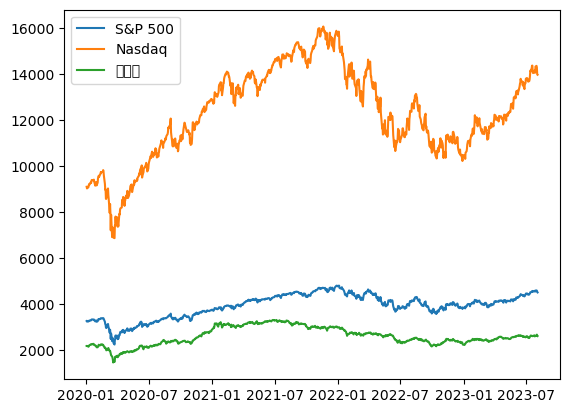

In [23]:
## 간단한 use case
### 미국, 한국의 index graph 비교하기!
### matplotlib 필요

import matplotlib.pyplot as plt

stock_dict = get_stock_history_from_yahoo(file="index.csv", start="2020-01-01")
for key, value in stock_dict.items():
    # plt.figure(figsize=(15,5))
    # plt.figure()
    plt.plot(value["Close"], label=key)
    plt.legend()
plt.show() 